In [16]:
# Setup
import numpy as np 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14  
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
PROJECT_ROOT_DIR = "."
import seaborn as sns
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 

In [17]:
HW4_data = pd.read_excel("C:/Users/ysyan/OneDrive/Desktop/Intro to BA/HW4.xlsx")
HW4_data.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [34]:
HW4_data.shape

(2000, 22)

In [19]:
HW4_data.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


In [20]:
# check for null values 
print(HW4_data.isnull().sum())

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64


Spending statistical results: DescribeResult(nobs=2000, minmax=(array([0.]), array([1500.06])), mean=array([102.560745]), variance=array([34875.49372826]), skewness=array([3.92549439]), kurtosis=array([20.53912844]))


<Figure size 576x432 with 0 Axes>

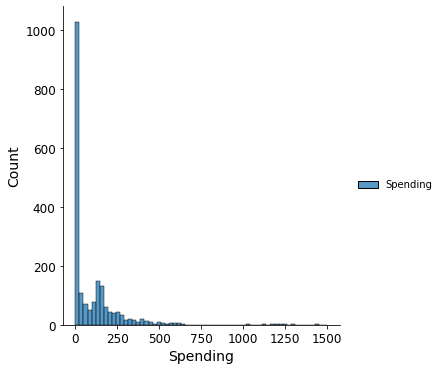

In [21]:
y = HW4_data.iloc[:,-1:]
X = HW4_data.iloc[:, 1:-1]
del X['Purchase']
del HW4_data['Purchase']
del HW4_data['sequence_number']
plt.figure(3,figsize=(8, 6))
sns.displot(y)
plt.xlabel("Spending") 
print("Spending", "statistical results:", sp.stats.describe(y))

Freq statistical results: DescribeResult(nobs=2000, minmax=(0, 15), mean=1.417, variance=1.9760990495247626, skewness=2.978831957861886, kurtosis=15.997895658160584)


<Figure size 576x432 with 0 Axes>

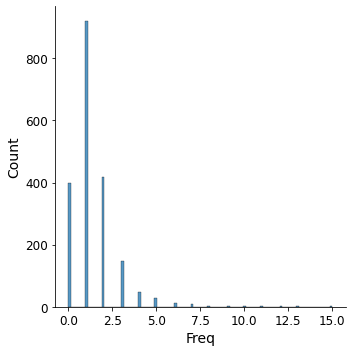

In [22]:
plt.figure(3,figsize=(8, 6))
sns.displot(X.loc[:,'Freq'])
plt.xlabel("Freq") 
print("Freq", "statistical results:", sp.stats.describe(X.loc[:,'Freq']))

last_update_days_ago statistical results: DescribeResult(nobs=2000, minmax=(1, 4188), mean=2155.101, variance=1302572.1868924464, skewness=-0.1877302916019205, kurtosis=-1.191994205413851)


<Figure size 576x432 with 0 Axes>

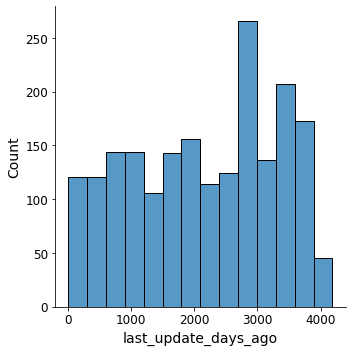

In [23]:
plt.figure(3,figsize=(8, 6))
sns.displot(X.loc[:,'last_update_days_ago'])
plt.xlabel("last_update_days_ago") 
print("last_update_days_ago", "statistical results:", sp.stats.describe(X.loc[:,'last_update_days_ago']))

<AxesSubplot:>

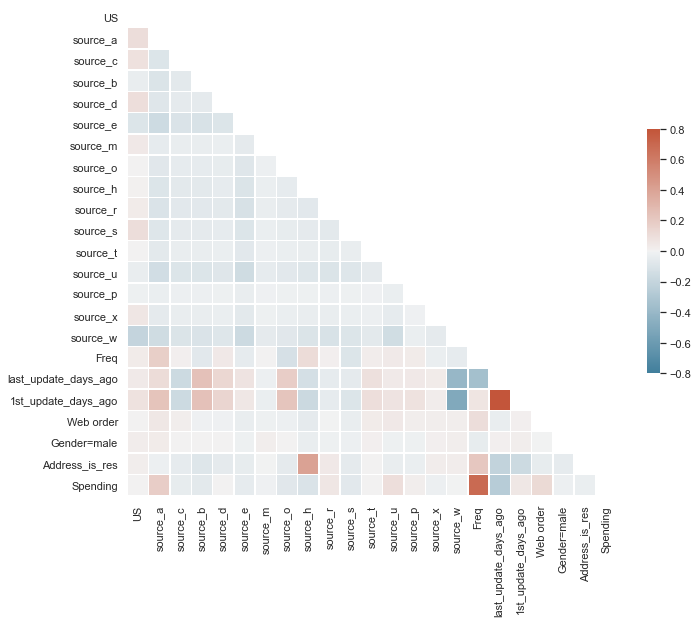

In [24]:
sns.set_theme(style="white")
corr = HW4_data.iloc[:, 0:].corr()
mask = np.triu(np.ones_like(corr))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, vmin=-.8,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
del X['1st_update_days_ago']
del HW4_data['1st_update_days_ago']

<AxesSubplot:xlabel='Spending'>

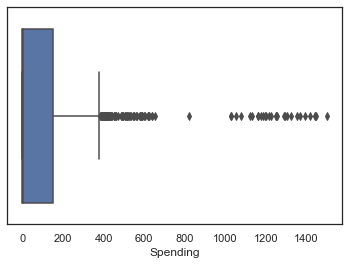

In [26]:
sns.boxplot(x=HW4_data.loc[:,'Spending'])

<AxesSubplot:xlabel='last_update_days_ago'>

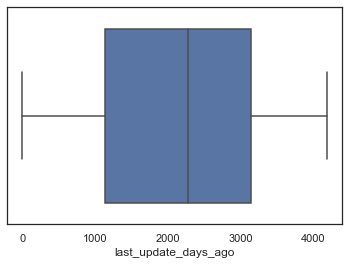

In [27]:
sns.boxplot(x=HW4_data.loc[:,'last_update_days_ago'])

<AxesSubplot:xlabel='Freq'>

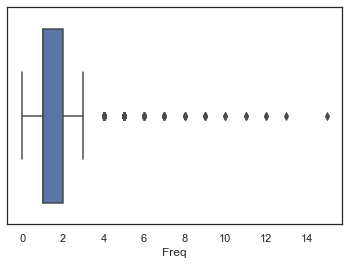

In [28]:
sns.boxplot(x=HW4_data.loc[:,'Freq'])

In [30]:
HW4_data1 = HW4_data.loc[:, ('Spending','last_update_days_ago','Freq')]

In [31]:
Q1 = HW4_data1.quantile(0.25)
Q3 = HW4_data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Spending                 152.5325
last_update_days_ago    2006.2500
Freq                       1.0000
dtype: float64


In [32]:
HW4_data2 = HW4_data1[~((HW4_data1 < (Q1 - 1.5 * IQR)) |(HW4_data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
HW4_data2.shape

(1839, 3)

In [33]:
HW4_data1.shape

(2000, 3)

In [35]:
HW4_data.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,Web order,Gender=male,Address_is_res,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,0.068500,...,0.119000,0.006000,0.018000,0.137500,1.417000,2155.101000,0.426000,0.524500,0.221000,102.560745
std,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,0.252665,...,0.323869,0.077246,0.132984,0.344461,1.405738,1141.302846,0.494617,0.499524,0.415024,186.749816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1133.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2280.000000,0.000000,1.000000,0.000000,1.855000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3139.250000,1.000000,1.000000,0.000000,152.532500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.000000,4188.000000,1.000000,1.000000,1.000000,1500.060000


In [38]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

y = HW4_data.iloc[:,-1:]
X = HW4_data.iloc[:, 0:-1]
y.describe()
X.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,Web order,Gender=male,Address_is_res
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,0.068500,...,0.02150,0.119000,0.006000,0.018000,0.137500,1.417000,2155.101000,0.426000,0.524500,0.221000
std,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,0.252665,...,0.14508,0.323869,0.077246,0.132984,0.344461,1.405738,1141.302846,0.494617,0.499524,0.415024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1133.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2280.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,3139.250000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,15.000000,4188.000000,1.000000,1.000000,1.000000


In [40]:
from sklearn.model_selection import train_test_split # Split validation class
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,Web order,Gender=male,Address_is_res
836,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4,1240,0,1,0
575,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,2417,1,1,0
557,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1618,1,0,1
1235,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3,1877,1,1,0
1360,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3620,1,0,0


## kNN

In [41]:
#normalization
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#train the model 

knn = neighbors.KNeighborsRegressor(n_neighbors=5,
                                    weights='distance',
                                    p=3, 
                                    metric='minkowski')
knn = knn.fit(X_train_std, y_train)  
#predict
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [43]:
#RMSE
print('RMSE train: %.3f, test: %.3f' % (  
        mean_squared_error(y_train, y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False))) 
#MAE
print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) 

RMSE train: 190.177, test: 181.839
MAE train: 123.961, test: 119.626


In [44]:
cv=KFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(knn,X,y,scoring='neg_root_mean_squared_error',cv=cv)
scores1=cross_val_score(knn,X,y,scoring='neg_mean_absolute_error',cv=cv)
print("Mean RMSE: %0.3f (+/- %0.3f)" % (abs(np.mean(scores)),np.std(scores)))
print(scores)

Mean RMSE: 170.715 (+/- 27.266)
[-182.25176585 -204.01683174 -150.87290618 -113.98124523 -168.77267593
 -180.08675324 -192.51373723 -135.000637   -191.67760276 -187.97972377]


# Tree Regression 

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test) 

In [46]:
#RMSE
print('RMSE train: %.3f, test: %.3f' % (  
        mean_squared_error(y_train, y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False))) 
print('MAE train: %.3f, test: %.3f' % ( 
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))

RMSE train: 111.031, test: 149.426
MAE train: 63.197, test: 74.963


In [47]:
cv=KFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(tree,X,y,scoring='neg_root_mean_squared_error',cv=cv)
print("Mean RMSE: %0.3f (+/- %0.3f)" % (abs(np.mean(scores)),np.std(scores)))
print(scores)

Mean RMSE: 136.890 (+/- 29.733)
[-117.57007427 -162.84953953 -129.31542872 -107.90514885 -134.39019933
 -113.41275462 -178.20465379  -86.61204741 -169.58136532 -169.05995912]


# Linear  Regression

In [48]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression() 
slr.fit(X_train, y_train)  
y_train_pred = slr.predict(X_train) 
y_test_pred = slr.predict(X_test)   

In [49]:
#RMSE
print('RMSE train: %.3f, test: %.3f' % (  
        mean_squared_error(y_train, y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False))) 
print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))

RMSE train: 125.344, test: 128.776
MAE train: 76.498, test: 74.241


In [50]:
scores=cross_val_score(slr,X,y,scoring='neg_root_mean_squared_error',cv=cv)
print("Mean RMSE: %0.3f (+/- %0.3f)" % (abs(np.mean(scores)),np.std(scores)))
print(scores)

Mean RMSE: 125.914 (+/- 20.779)
[-119.1227696  -138.74211123 -129.41703573 -100.12653614 -122.93429188
 -120.32750097 -160.27332999  -85.59902639 -133.8609901  -148.73375198]


# Lasso Regression 

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3)  
lasso.fit(X_train, y_train) 
y_train_pred_Lasso = lasso.predict(X_train) 
y_test_pred_Lasso = lasso.predict(X_test) 

In [52]:
#RMSE
print('RMSE train: %.3f, test: %.3f' % (  
        mean_squared_error(y_train, y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False))) 
print('MAE train: %.3f, test: %.3f' % ( 
        mean_absolute_error(y_train, y_train_pred_Lasso),
        mean_absolute_error(y_test, y_test_pred_Lasso)))

RMSE train: 125.344, test: 128.776
MAE train: 76.526, test: 74.157


In [53]:
cv=KFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(lasso,X,y,scoring='neg_root_mean_squared_error',cv=cv)
print("Mean RMSE: %0.3f (+/- %0.3f)" % (abs(np.mean(scores)),np.std(scores)))
print(scores)

Mean RMSE: 125.705 (+/- 20.915)
[-118.94625574 -138.75947891 -129.07186926 -100.09956979 -122.27286051
 -120.11653972 -160.18298166  -84.99236623 -133.70461584 -148.89881901]


# Ridge Regression

In [54]:
from sklearn.linear_model import Ridge 
ridge = Ridge(alpha=0.3,random_state=42) 
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train) 
y_test_pred_ridge = ridge.predict(X_test)

In [56]:
#RMSE
print('RMSE train: %.3f, test: %.3f' % (  
        mean_squared_error(y_train, y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False))) 
print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_ridge),
        mean_absolute_error(y_test, y_test_pred_ridge))) 

RMSE train: 125.344, test: 128.776
MAE train: 76.505, test: 74.235


In [58]:
scores=cross_val_score(ridge,X,y,scoring='neg_root_mean_squared_error',cv=cv)
print("Mean RMSE: %0.3f (+/- %0.3f)" % (abs(np.mean(scores)),np.std(scores)))
print(scores)

Mean RMSE: 125.908 (+/- 20.784)
[-119.12647559 -138.73217017 -129.40320702 -100.11982527 -122.92150883
 -120.32628823 -160.27210312  -85.57370639 -133.86572974 -148.73521123]
